<a href="https://colab.research.google.com/github/armendp/AcademicPerformanceDrivers/blob/main/Capstone_3_Academic_Performance_Drivers.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Capstone 3: Academic Performance Drivers

Goal: To find key metrics that can be used to predict student academic performance to help parents, teachers and businesses make better decisions and investments regarding education

# Importing Data and Modules

In [ ]:
# Mounted my google drive into google colab
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
# Imports pandas, numpy, stats
import pandas as pd
import numpy as np
import seaborn as sns
from scipy import stats

# Reads csv file from drive and assigns it to variable df
df = pd.read_csv('/content/gdrive/My Drive/Capstone 3- Student Performance/student_data_raw.csv', delimiter=";")

# Data Summary

In [ ]:
# Gives the shape of the DataFrame
df.shape

(395, 33)

In [ ]:
# Gives general info of the columns in the DataFrame- no nulls in our dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   school      395 non-null    object
 1   sex         395 non-null    object
 2   age         395 non-null    int64 
 3   address     395 non-null    object
 4   famsize     395 non-null    object
 5   Pstatus     395 non-null    object
 6   Medu        395 non-null    int64 
 7   Fedu        395 non-null    int64 
 8   Mjob        395 non-null    object
 9   Fjob        395 non-null    object
 10  reason      395 non-null    object
 11  guardian    395 non-null    object
 12  traveltime  395 non-null    int64 
 13  studytime   395 non-null    int64 
 14  failures    395 non-null    int64 
 15  schoolsup   395 non-null    object
 16  famsup      395 non-null    object
 17  paid        395 non-null    object
 18  activities  395 non-null    object
 19  nursery     395 non-null    object
 20  higher    

In [ ]:
# First five rows of the DataFrame
df.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,course,mother,2,2,0,yes,no,no,no,yes,yes,no,no,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,course,father,1,2,0,no,yes,no,no,no,yes,yes,no,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,other,mother,1,2,3,yes,no,yes,no,yes,yes,yes,no,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,home,mother,1,3,0,no,yes,yes,yes,yes,yes,yes,yes,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,home,father,1,2,0,no,yes,yes,no,yes,yes,no,no,4,3,2,1,2,5,4,6,10,10


In [ ]:
# Gives summary statistics of student grades
df['G3'].describe()

count    395.000000
mean      10.415190
std        4.581443
min        0.000000
25%        8.000000
50%       11.000000
75%       14.000000
max       20.000000
Name: G3, dtype: float64

**Final grades are labeled as G3 and are on a sliding scale of 0-20**

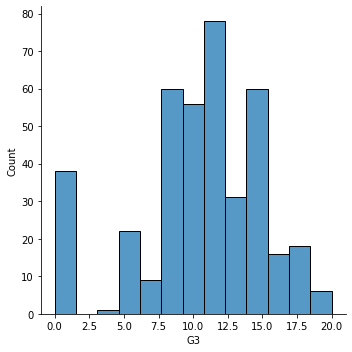

In [ ]:
# Vizualizes the grades using a histogram- data is normally distributed
ax = sns.displot(df['G3'])

# Hypothesis Test #1:

H0: There is no difference in academic performance between students with at least one parent with higher education and students with no parents with higher education.

H1: Students with at least one parent with higher education perform better than students with no parents with higher education.

 
Significance Level: .05

Test Statistic: 1.96


**EDUCATION SCALE**

Education levels are on a scale of 0-4

0- No education

1- Primary education (up to 4th grade)

2- 5th to 9th grade

3- Secondary education (up to 12th grade)

4- Higher Education

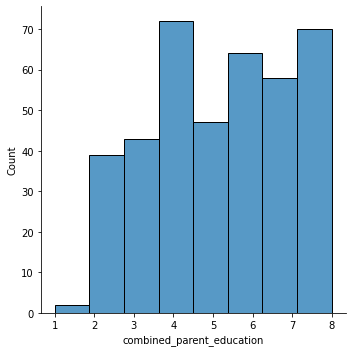

In [ ]:
# Creates a new column in the DataFrame with the combined parent education levels
df['combined_parent_education'] = df['Medu'] + df['Fedu']

# Visualize the distribution of parent education levels
sns.displot(df['combined_parent_education'], bins = 8)

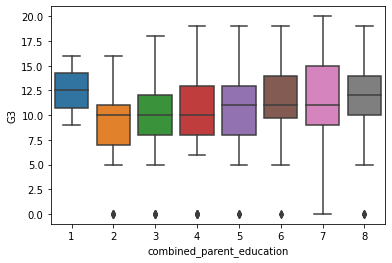

In [ ]:
# Visualizaes the student grades using a boxplot based on combined parent education levels
sns.boxplot(y = 'G3', x = 'combined_parent_education', data = df )


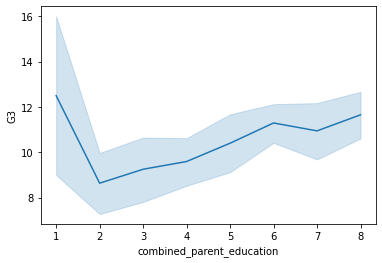

In [ ]:
# Visualizaes the student grades using a lineplot based on combined parent education levels

sns.lineplot(x = 'combined_parent_education', y = 'G3', data = df)

**FIRST LOOK**

The data contains a mixed sample of students with a wide range of combined parent education levels over 2. We have only a few samples of students with a combined parent education level under 2. Our boxplot and lineplot shows a positive correlation between combined parent education and student performance. The outlier in the data is in students with a combined parent education of below 2 who seem to completely contridict this trend. This can be attributed to the low sample size of that group. 



In [ ]:
# Creates a new column in the DataFrame that is True if either the father or mother has higher education as defined in the columns Medu and Fedu
df['parent_higher_education'] = np.where((df['Medu'] == 4) | (df['Fedu'] == 4), True, False)

In [ ]:
# Seperates the two samples into two DataFrames
one_parent_higher_education = df.iloc[(df['parent_higher_education'] == True).values]
no_parent_higher_education = df.iloc[(df['parent_higher_education'] == False).values]

# Checks the count of unique values in our parent_higher_education column- we're checking to see if our sample size is big enough in each group to perform a independent t-test- we have enough
df['parent_higher_education'].value_counts()

False    238
True     157
Name: parent_higher_education, dtype: int64

In [ ]:
# Performs an independent-samples t-test on our two samples
stats.ttest_ind(one_parent_higher_education['G3'], no_parent_higher_education['G3'])

Ttest_indResult(statistic=4.1401025080356195, pvalue=4.2509133132939754e-05)

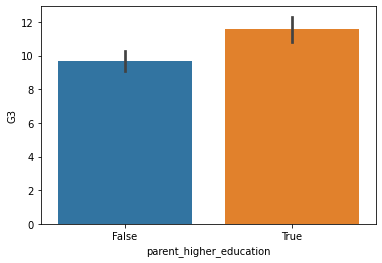

In [ ]:
# Visualizes the difference between the two samples in a barplot
sns.barplot(x = 'parent_higher_education', y = 'G3', data = df)

**HYPOTHESIS TEST CONCLUSION**

Our p-value of 4.2509e-.05 is LOWER than our significance level of .05

Our t-statistic of 4.14 is HIGHER than 1.96

We can REJECT the null hypothesis and ACCEPT the alternative hypothesis


# Hypothesis Testing #2
H0: There is no difference in academic performance between students with over two hours of weekly study time and students with two hours or less of weekly study time.

H1: Students with over two hours of weekly study time perform better than students with two hours or less of weekly study time. 
 
Significance Level: .05

Test Statistic: 1.96


**STUDYTIME SCALE**

Students in our sample have a studytime between 0 and 4 hours per week

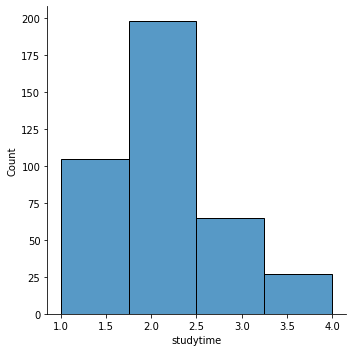

In [ ]:
# Visualize the distribution of student study hours
sns.displot(df['studytime'], bins = 4)

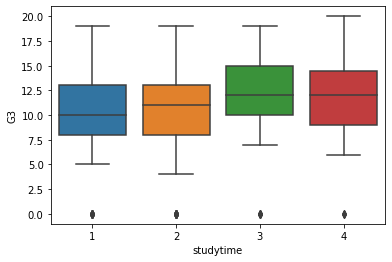

In [ ]:
sns.boxplot(x = 'studytime', y = 'G3', data = df)

**FIRST LOOK**

A majority of our sample is on the lower end of studytime, but we have a big enough sample size across the board. Our boxplot visualization shows a general positive correlation between studytime and student performance

In [ ]:
# Seperates the two samples into two DataFrames
study_time_over_two = df.iloc[(df['studytime'] > 2).values]
study_time_under_two = df.iloc[(df['studytime'] <= 2).values]

# Checks the count of unique values in the studytime column- we're checking to see if our sample size is big enough in each group to perform a independent t-test- we have enough
df['studytime'].value_counts()

2    198
1    105
3     65
4     27
Name: studytime, dtype: int64

In [ ]:
stats.ttest_ind(study_time_over_two['G3'], study_time_under_two['G3'])

Ttest_indResult(statistic=2.2671657821810296, pvalue=0.02392264711546323)

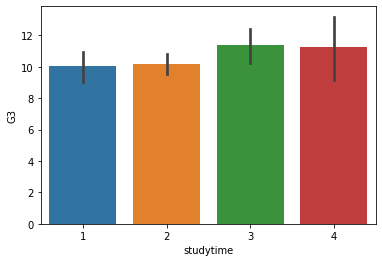

In [ ]:
# Visualizes the difference in grades by studyhours
sns.barplot(x = 'studytime', y = 'G3', data = df)

**HYPOTHESIS TEST CONCLUSION**

Our p-value of 0.023 is LOWER than our significance level of .05

Our t-statistic of 2.2671 is HIGHER than 1.96

We can REJECT the null hypothesis and ACCEPT the alternative hypothesis

# Hypothesis Test #3
H0: There is no difference in academic performance between students participating in an extracurricular activity and students not participating in an extracurricular activity

H1: Students participating in an extracurricular activity perform better than students whom do not participate in an extracurricular activity




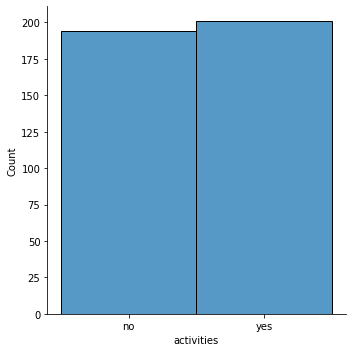

In [ ]:
# Visualizes the distribution of students who particpate in extracurrircular activities
sns.displot(df['activities'])

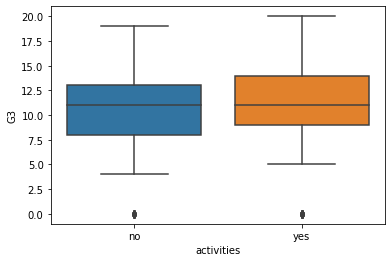

In [ ]:
sns.boxplot(x = 'activities', y = 'G3', data = df)

**FIRST LOOK**

We have an almost equal distribution between students who participate in extracurriculars and students who dont. Our boxplot shows that students who participate in extracurricular activities have a very slight performance edge to students who dont.

In [ ]:
# Seperates the two samples into two DataFrames
extracurricular = df.iloc[(df['activities'] == 'yes').values]
no_extracurricular = df.iloc[(df['activities'] == 'no').values]

# Checks the count of unique values in the activities column- we're checking to see if our sample size is big enough in each group to perform a independent t-test- we have enough
df['activities'].value_counts()

yes    201
no     194
Name: activities, dtype: int64

In [ ]:
# We do an independent-samples t-test on our two samples
stats.ttest_ind(extracurricular['G3'], no_extracurricular['G3'])

Ttest_indResult(statistic=0.319205514582678, pvalue=0.7497402737748432)

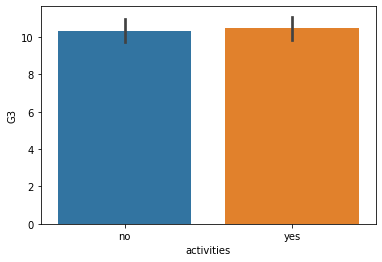

In [ ]:
sns.barplot(x = 'activities', y = 'G3', data = df)

**HYPOTHESIS TEST CONCLUSION**

Our p-value of 0.7497 is HIGHER than our significance level of .05

Our t-statistic of 0.319 is LOWER than 1.96

We can ACCEPT the null hypothesis and REJECT the alternative hypothesis

# Final Conclusions

**Hypothesis Test #1:** We accept that alternative hypothesis that students with at least one parent with higher education perform better than students with no parents with higher education.

**Hypothesis Test #2:** We accept the alternative hypothesis that students with over two hours of weekly study time perform better than students with two hours or less of weekly study time.

**Hypothesis Test #3:** We accept the null hypothesis that there is no difference in academic performance between students participating in an extracurricular activity and students who do not.

# Recommendations

1. Students with higher educated parents perform better than students without higher educated parents. This is probably due to the one on one help higher educated parents are able to provide to their children. Lower educated parents should suppliment their childs school education with other learning resources to give their children additional sources of education. Schools should offer additional learning resources to students. Businesses should invest in developing affordable educational resources for students who need more one on one help that some parents are not able to provide to their children.

2. Students who study more than two hours weekly perform better than students who study two or less hours every week. Parents should encourage their children to study for a set period of time every week. Schools should host study sessions with teacher supervision to help students. Businesses can create and sell study resources that help make study time more efficient.